In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import time

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "difficulty_lvl"]


df = pd.read_csv('../NSL-KDD/KDDTrain+.txt', header = None, names = col_names)
df_test = pd.read_csv('../NSL-KDD/KDDTest+.txt', header = None, names = col_names)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_lvl
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_lvl
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [6]:
df['traffic_type'] = df['attack'].apply(lambda x: 0 if x == 'normal' else 1)
df_test['traffic_type'] = df_test['attack'].apply(lambda x: 0 if x == 'normal' else 1)

In [7]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_lvl,traffic_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [8]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,difficulty_lvl,traffic_type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11,1


In [9]:
# normal : 0
dos_attacks = ['neptune', 'teardrop', 'smurf', 'pod', 'land'] # 1
probe_attacks = ['ipsweep', 'portsweep', 'nmap', 'satan'] # 2
r2l_attacks = ['guess_passwd', 'ftp_write', 'multihop', 'phf', 'spy', 'perl'] # 3
u2r_attacks = ['warezclient', 'back', 'buffer_overflow', 'rootkit', 'loadmodule', 'imap', 'warezmaster'] #4

In [10]:
def attackType(attack):
    if attack in dos_attacks:
        return 1
    elif attack in probe_attacks:
        return 2
    elif attack in r2l_attacks:
        return 3
    elif attack in u2r_attacks:
        return 4
    else:
        return 0

df['attack_type'] = df['attack'].apply(attackType)
df_test['attack_type'] = df_test['attack'].apply(attackType)

In [11]:
df = df.drop('difficulty_lvl', axis=1)
df_test = df_test.drop('difficulty_lvl', axis=1)
df = df.drop('attack', axis=1)
df_test = df_test.drop('attack', axis=1)

In [12]:
# traffic_type: 1 for attack, 0 for normal
# attack_type: 0 for normal, 1,2,3,4 for attack

In [13]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,traffic_type,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0


In [14]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,traffic_type,attack_type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1,0
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1,0


In [15]:
df['traffic_type'].value_counts()

0    67343
1    58630
Name: traffic_type, dtype: int64

In [16]:
df['attack_type'].value_counts()

0    67343
1    44971
2    11656
4     1926
3       77
Name: attack_type, dtype: int64

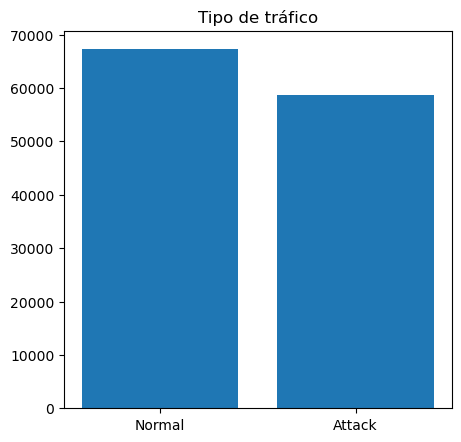

In [17]:
# Histograma tipo de trafico
plt.figure(figsize=(5,5),dpi=100)
plt.bar(['Normal','Attack'], df['traffic_type'].value_counts())
plt.title('Tipo de tráfico')
plt.show()

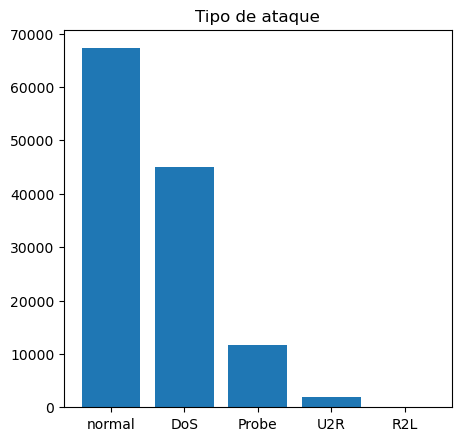

In [18]:
# Histograma tipo de ataque
plt.figure(figsize=(5,5),dpi=100)
plt.bar(['normal', 'DoS', 'Probe', 'U2R', 'R2L'], (df['attack_type'].value_counts()))
plt.title('Tipo de ataque')
plt.show()

In [19]:
# Distribucion de protocolos
df['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [20]:
# Tipo de trafico segun protocolo
traffic_by_protocol = pd.DataFrame(pd.crosstab(df.traffic_type, df.protocol_type))
traffic_by_protocol

protocol_type,icmp,tcp,udp
traffic_type,,,
0,1309,53600,12434
1,6982,49089,2559


In [21]:
# Tipo de ataque segun protocolo
attack_by_protocol = pd.DataFrame(pd.crosstab(df.attack_type, df.protocol_type))
attack_by_protocol

protocol_type,icmp,tcp,udp
attack_type,,,
0,1309,53600,12434
1,2847,41232,892
2,4135,5857,1664
3,0,77,0
4,0,1923,3


In [22]:
flags_by_attack = pd.DataFrame(pd.crosstab(df.flag, df.attack_type))
flags_by_attack

attack_type,0,1,2,3,4
flag,,,,,
OTH,11,0,35,0,0
REJ,2693,5671,2869,0,0
RSTO,219,1216,80,45,2
RSTOS0,0,0,103,0,0
RSTR,146,0,2180,4,91
S0,354,34344,153,0,0
S1,361,0,1,0,3
S2,119,0,2,0,6
S3,45,0,1,2,1


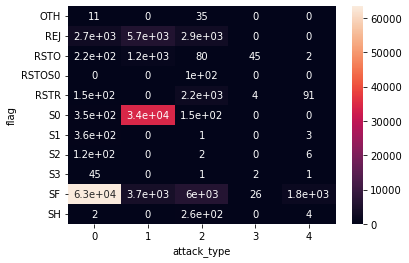

In [23]:
sns.heatmap(flags_by_attack, annot=True)
plt.show()

In [24]:
service_by_attack = pd.DataFrame(pd.crosstab(df.service, df.attack_type))
service_by_attack

attack_type,0,1,2,3,4
service,,,,,
IRC,186,0,1,0,0
X11,67,0,6,0,0
Z39_50,0,851,11,0,0
aol,0,0,2,0,0
auth,236,703,16,0,0
...,...,...,...,...,...
urp_i,599,0,3,0,0
uucp,0,769,11,0,0
uucp_path,0,676,13,0,0


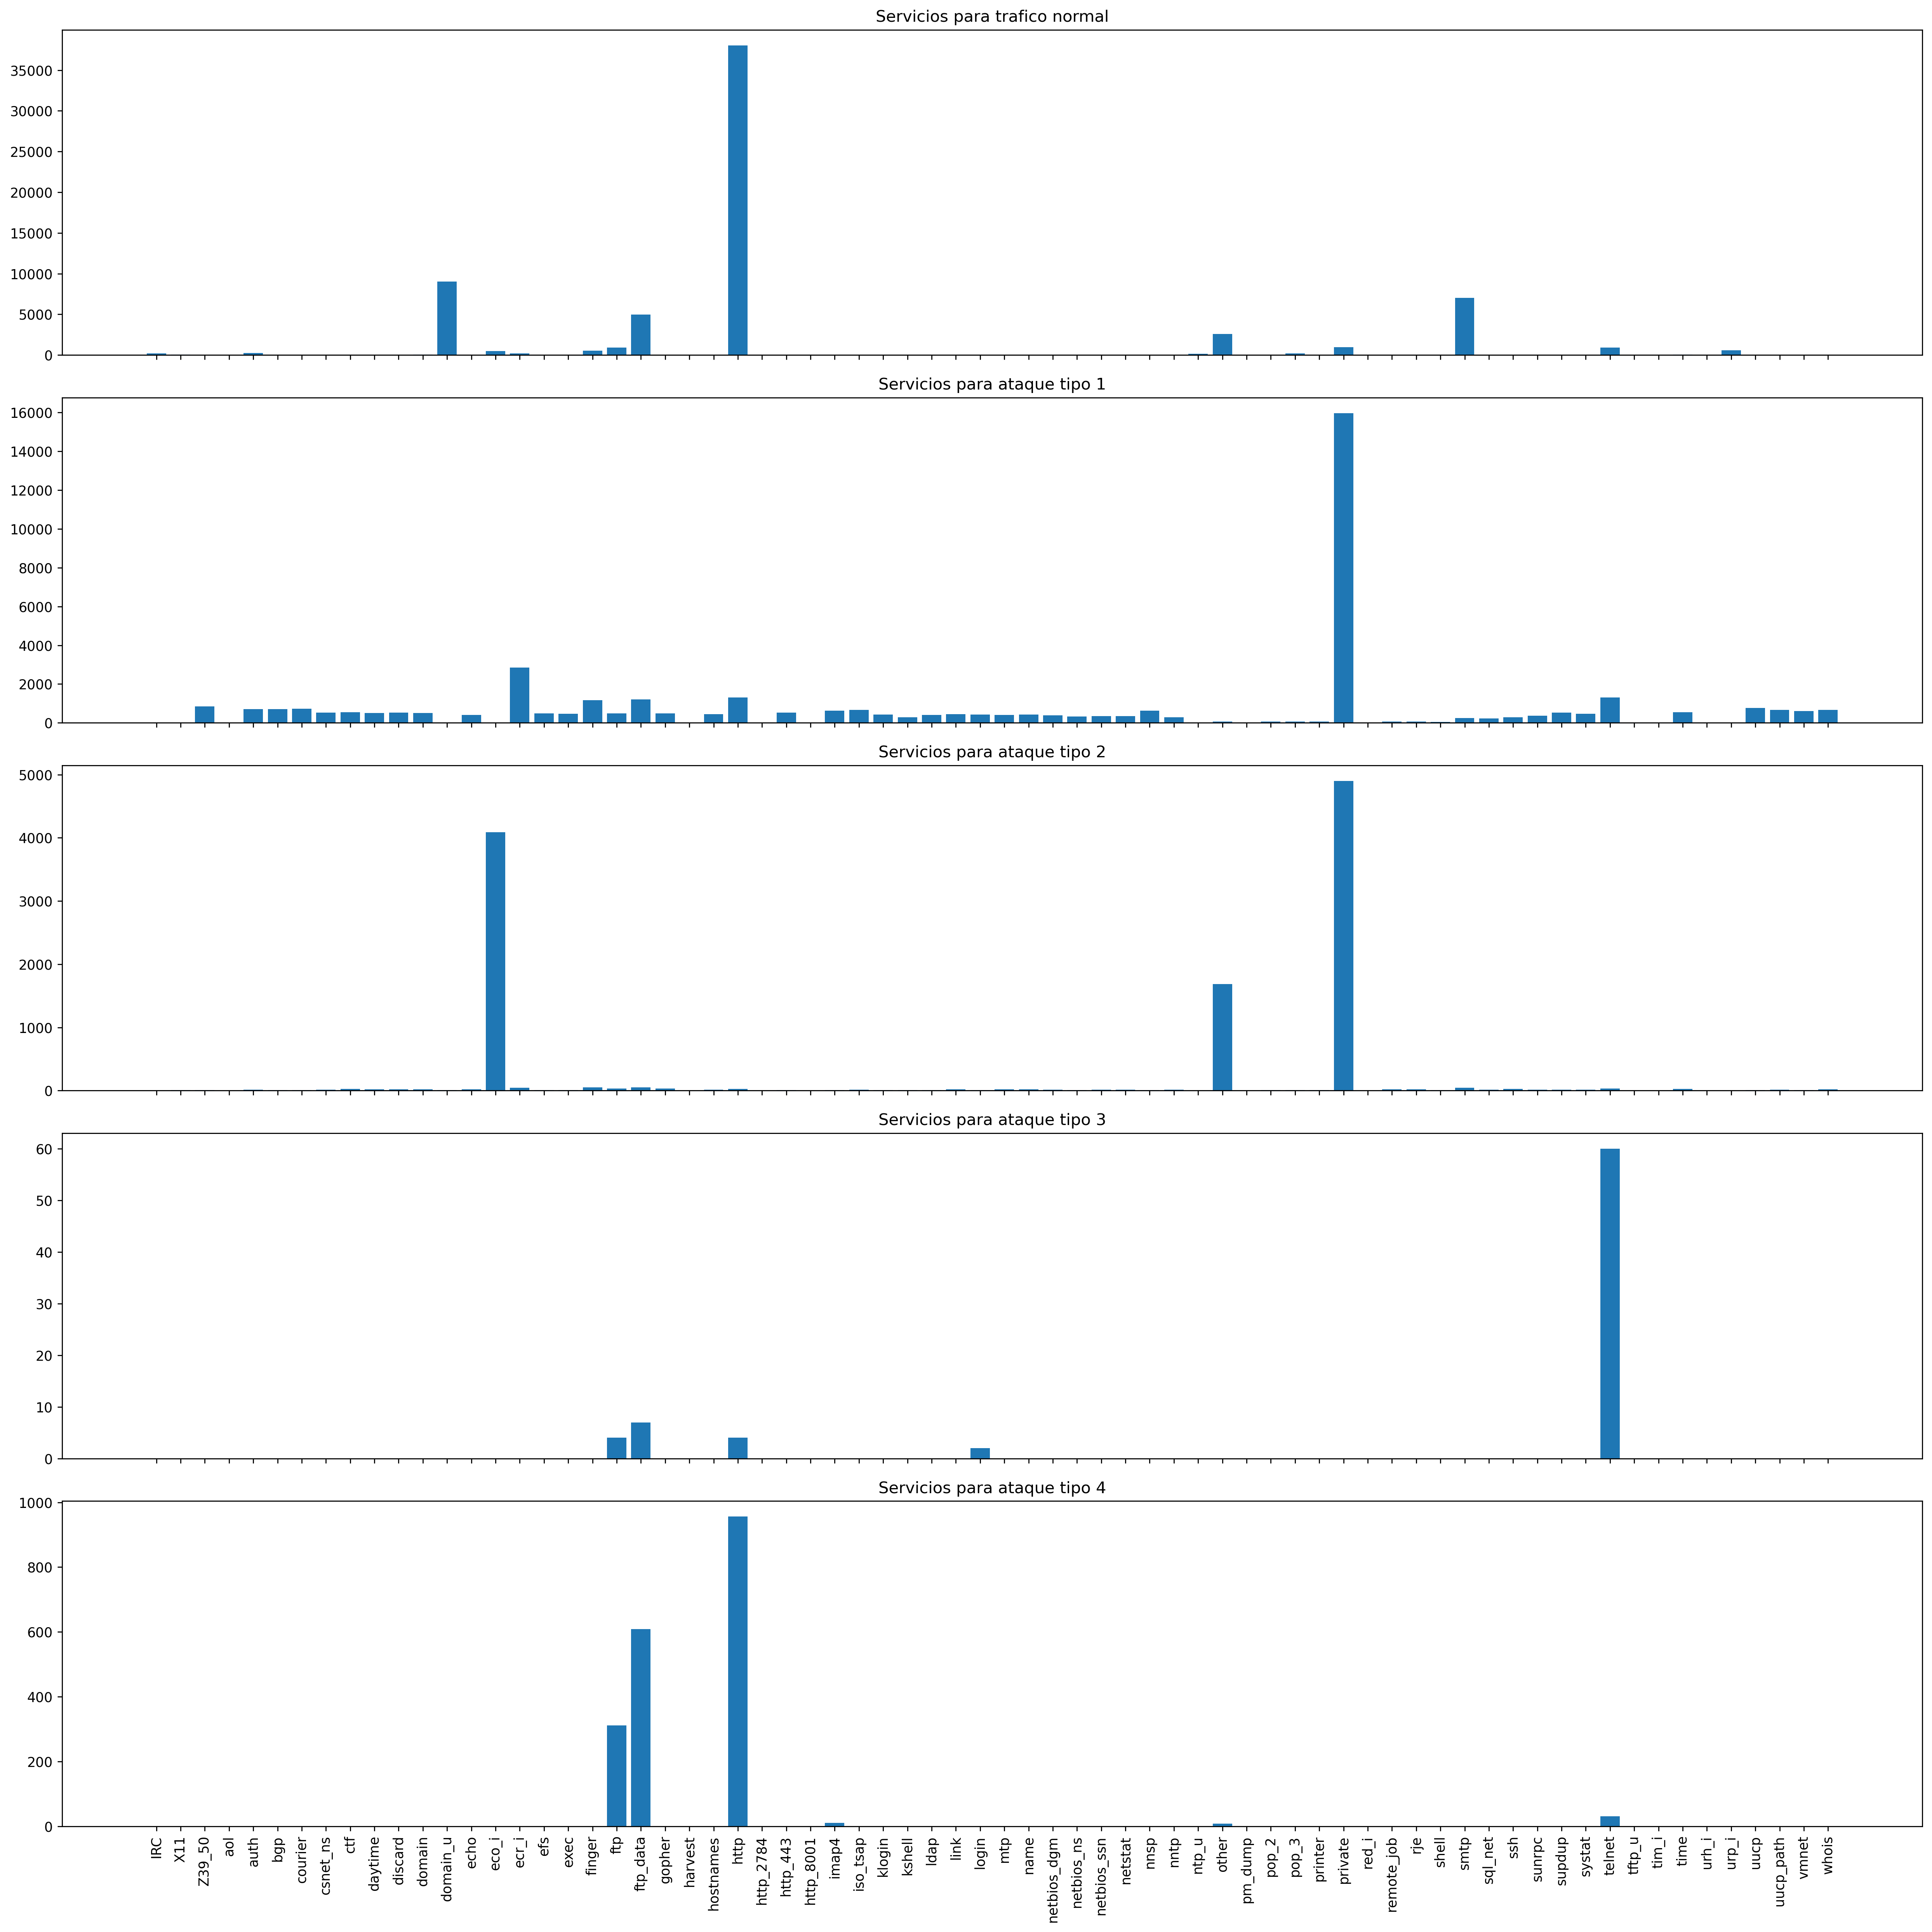

In [25]:
# Servicios segun ataque

fig, axs = plt.subplots(5,1,figsize=(20,20),dpi=250)

axs[0].bar(service_by_attack.index, service_by_attack[0])
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_title('Servicios para trafico normal')

axs[1].bar(service_by_attack.index, service_by_attack[1])
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_title('Servicios para ataque tipo 1')

axs[2].bar(service_by_attack.index, service_by_attack[2])
axs[2].tick_params(axis='x', rotation=90)
axs[2].set_title('Servicios para ataque tipo 2')

axs[3].bar(service_by_attack.index, service_by_attack[3])
axs[3].tick_params(axis='x', rotation=90)
axs[3].set_title('Servicios para ataque tipo 3')

axs[4].bar(service_by_attack.index, service_by_attack[4])
axs[4].tick_params(axis='x', rotation=90)
axs[4].set_title('Servicios para ataque tipo 4')

plt.setp(axs[0].get_xticklabels(), visible=False)
plt.setp(axs[1].get_xticklabels(), visible=False)
plt.setp(axs[2].get_xticklabels(), visible=False)
plt.setp(axs[3].get_xticklabels(), visible=False)
plt.tight_layout()

plt.show()

In [26]:
dfPCA = df.copy()
dfPCA_test = df_test.copy()
dfM = df.copy()
dfM_test = df_test.copy()
dfMPCA = df.copy()
dfMPCA_test = df_test.copy()

In [111]:
def encoderLabel(df):
    le = LabelEncoder()
    df['protocol_type']=le.fit_transform(df['protocol_type'])
    df['service']=le.fit_transform(df['service'])
    df['flag']=le.fit_transform(df['flag'])

def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

def processing(df):
    cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login','traffic_type', 'attackType']
    ndf = df.drop(cat_cols, axis = 1)
    scaled_ndf = Scaling(ndf, ndf.columns)
    dfCat = df.drop(ndf.columns, axis = 1)
    dfCat[ndf.columns] = scaled_ndf[ndf.columns]

    dataframe = pd.get_dummies(dfCat, columns = ['protocol_type', 'service', 'flag'])

    return dataframe
    
def modelStandardization(xtrain, xtest): 
    std_s = RobustScaler()#StandardScaler()
    xtrain = std_s.fit_transform(xtrain)
    xtest = std_s.fit_transform(xtest)
    
def evaluation(name, isBinary, model, xTrain, yTrain, xTest, yTest):
    
    if isBinary:
        #train_accuracy = metrics.accuracy_score(yTrain, model.predict(xTrain))
        test_accuracy = metrics.accuracy_score(yTest, model.predict(xTest))

        #train_precision = metrics.precision_score(yTrain, model.predict(xTrain))
        test_precision = metrics.precision_score(yTest, model.predict(xTest))

        #train_recall = metrics.recall_score(yTrain, model.predict(x_train))
        test_recall = metrics.recall_score(yTest, model.predict(xTest))
    else:
        test_accuracy = metrics.accuracy_score(yTest, model.predict(xTest))

        #train_precision = metrics.precision_score(yTrain, model.predict(xTrain))
        test_precision = metrics.precision_score(yTest, model.predict(xTest), average='weighted', labels=np.unique(model.predict(xTest)))

        #train_recall = metrics.recall_score(yTrain, model.predict(x_train))
        test_recall = metrics.recall_score(yTest, model.predict(xTest), average='weighted')
        
    
    predicted = model.predict(xTest)
    print("==================================")
    print("Model: " + name)
    print("Type of classification:")
    print("Number of features: ", xTrain.shape[1])
    print("Test accuracy: ", test_accuracy)
    print("Test precision: ", test_precision)
    print("Test recall: ", test_recall)
    print("==================================")
    
    
    confusion_matrix = metrics.confusion_matrix(yTest, predicted)#, normalize='all')
    if isBinary:
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])
    else:
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'DoS', 'Probe', 'U2R', 'R2L'])
                
    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)
    plt.title("Confusion matrix using " + name)
    plt.show()
        


## Binary classification

### without PCA

In [165]:
DF = processing(df)
DF_TEST = processing(df_test)
DF_TEST = DF_TEST.reindex(columns=DF.columns, fill_value=0)

In [119]:
x_train = DF.drop(['traffic_type', 'attack_type'], axis=1).values
y_train = DF['traffic_type'].values
x_test = DF_TEST.drop(['traffic_type', 'attack_type'], axis=1).values
y_test = DF_TEST['traffic_type'].values


#### Linear regression

In [120]:
lr_1 = LogisticRegression(max_iter=3000).fit(x_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Linear Regression
Type of classification:
Number of features:  122
Test accuracy:  0.8000798438608943
Test precision:  0.9022222222222223
Test recall:  0.727655263773085


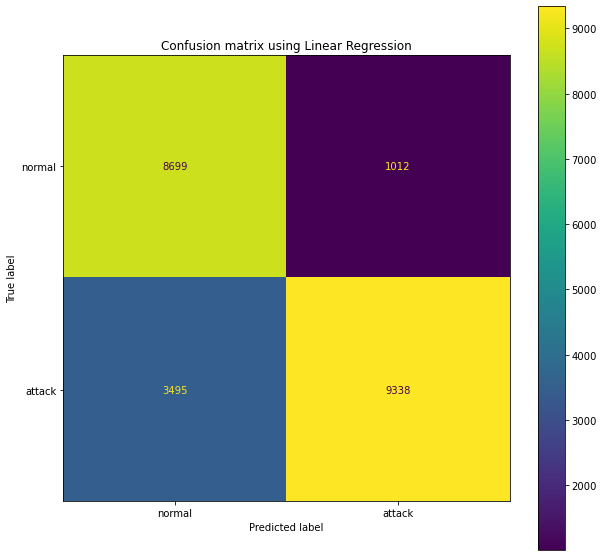

In [121]:
evaluation('Linear Regression', 1, lr_1, x_train, y_train, x_test, y_test)

#### SVM

In [122]:
svm_1 = svm.LinearSVC().fit(x_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model: SVM
Type of classification:
Number of features:  122
Test accuracy:  0.7997693399574166
Test precision:  0.8814305364511692
Test recall:  0.7490064677004598


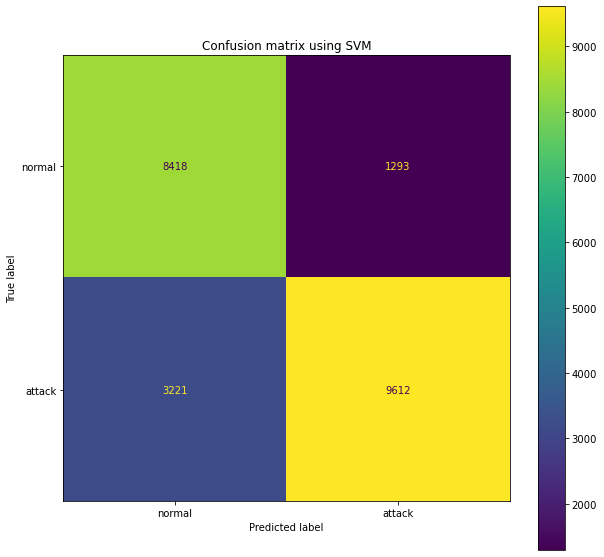

In [123]:
evaluation('SVM', 1, svm_1, x_train, y_train, x_test, y_test)

#### Decision Trees

In [124]:
dt_1 = DecisionTreeClassifier().fit(x_train, y_train)

Model: Decision Tree
Type of classification:
Number of features:  122
Test accuracy:  0.8516234918381831
Test precision:  0.9436132410697587
Test recall:  0.7863321125224032


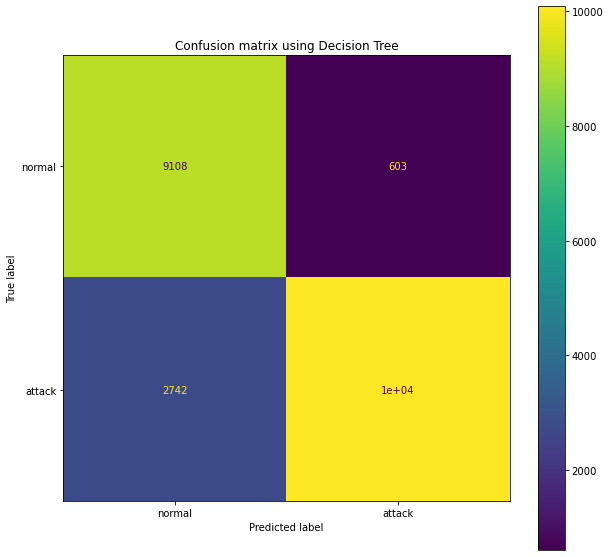

In [125]:
evaluation('Decision Tree', 1, dt_1, x_train, y_train, x_test, y_test)

#### Random Forests

In [126]:
rf_1 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy').fit(x_train, y_train)

Model: Random Forests
Type of classification:
Number of features:  122
Test accuracy:  0.8045156139105749
Test precision:  0.9581339712918661
Test recall:  0.6865892620587548


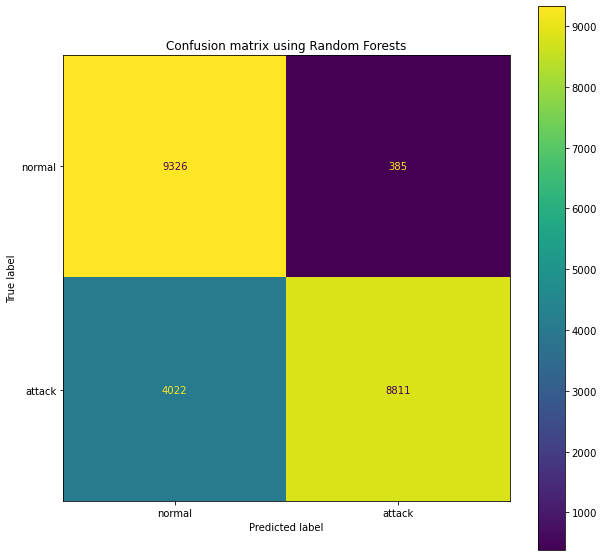

In [127]:
evaluation('Random Forests', 1, rf_1, x_train, y_train, x_test, y_test)

#### KNN

In [128]:
knn_1 = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)

Model: KNeighbors
Type of classification:
Number of features:  122
Test accuracy:  0.7716022001419447
Test precision:  0.9617788461538461
Test recall:  0.623548663601652


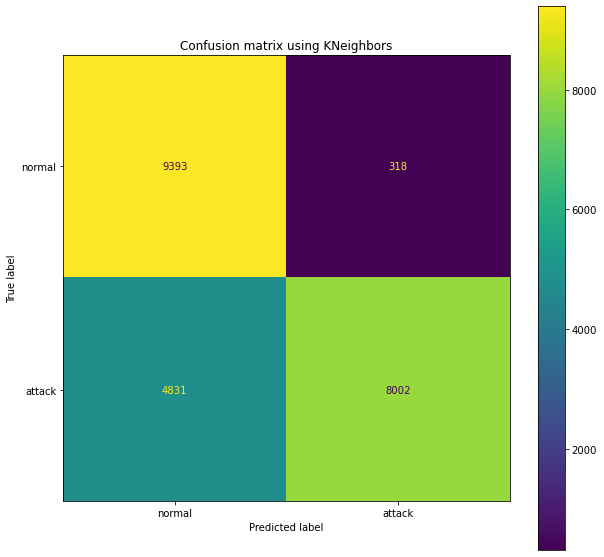

In [129]:
evaluation('KNeighbors', 1, knn_1, x_train, y_train, x_test, y_test)

### Using PCA

In [130]:
pca_1 = PCA(n_components=80)
pca_train_1 = pca_1.fit_transform(x_train)
pca_test_1 = pca_1.fit_transform(x_test)

#### Linear regression

In [131]:
lr_pca_1 = LogisticRegression(max_iter=3000).fit(pca_train_1, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Linear Regression using PCA
Type of classification:
Number of features:  80
Test accuracy:  0.5786462029808375
Test precision:  0.6038370499563972
Test recall:  0.7553962440582872


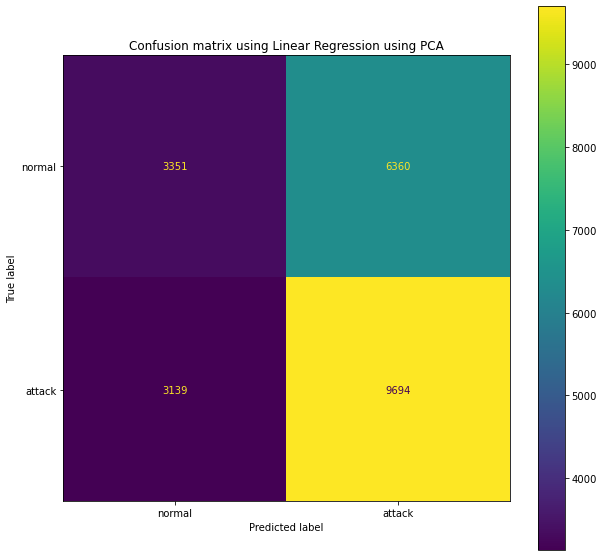

In [132]:
evaluation('Linear Regression using PCA', 1, lr_pca_1, pca_train_1, y_train, pca_test_1, y_test)

#### SVM

In [89]:
#scaling = MinMaxScaler(feature_range=(-1,1)).fit(pca_data)
#pcatrain_smv = scaling.transform(pca_data)
#pcatest_smv = scaling.transform(pca_test)

In [133]:
svm_2 = svm.LinearSVC().fit(pca_train_1, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model: SVM using PCA
Type of classification:
Number of features:  80
Test accuracy:  0.531139105748758
Test precision:  0.6032484715758737
Test recall:  0.515156237824359


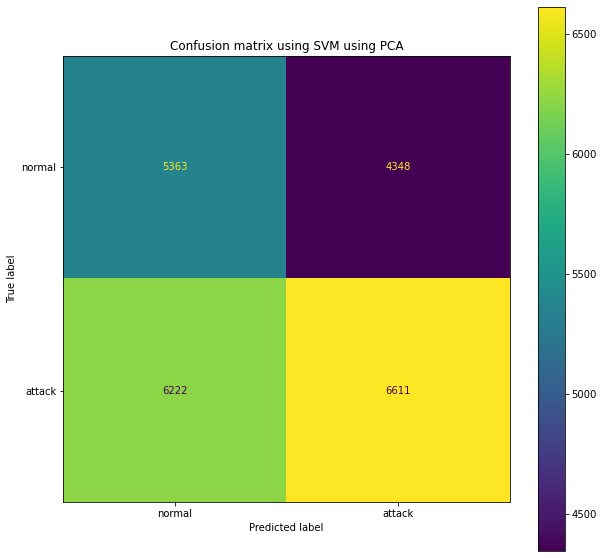

In [134]:
evaluation('SVM using PCA', 1, svm_2, pca_train_1, y_train, pca_test_1, y_test)

#### Decision Trees

In [135]:
dt_2 = DecisionTreeClassifier().fit(pca_train_1, y_train)

Model: Decision Tree using PCA
Type of classification:
Number of features:  80
Test accuracy:  0.4995120652945351
Test precision:  0.7051349920592906
Test recall:  0.20758980752746825


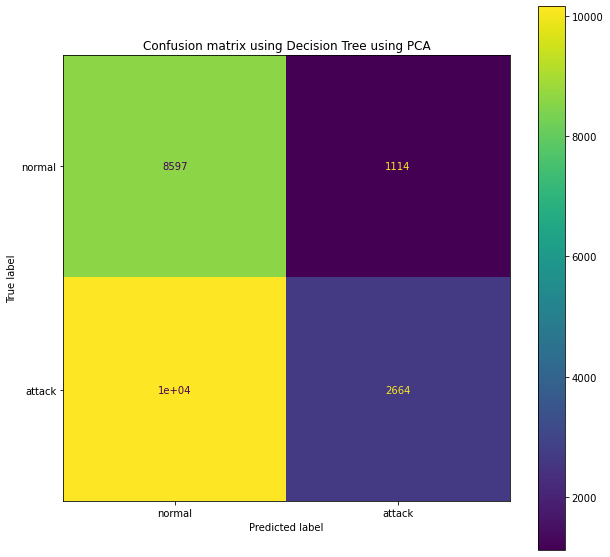

In [136]:
evaluation('Decision Tree using PCA', 1, dt_2, pca_train_1, y_train, pca_test_1, y_test)

#### Random Forests

In [137]:
rf_2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy').fit(pca_train_1, y_train)

Model: Random Forests Decision Tree using PCA
Type of classification:
Number of features:  80
Test accuracy:  0.4685947480482612
Test precision:  0.9144800777453839
Test recall:  0.07332657991116652


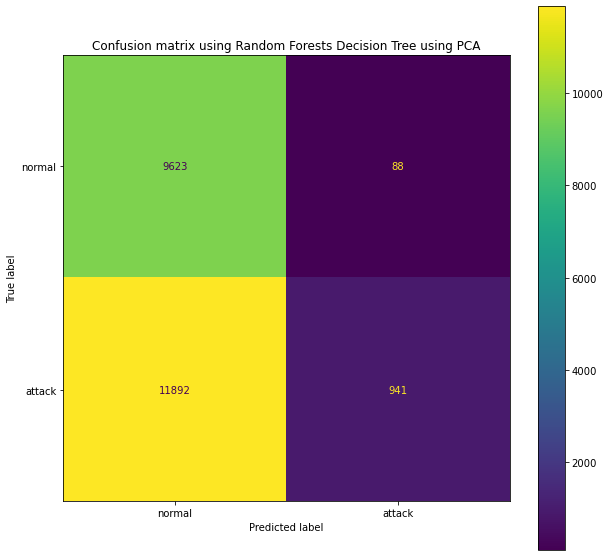

In [138]:
evaluation('Random Forests Decision Tree using PCA', 1, rf_2, pca_train_1, y_train, pca_test_1, y_test)

#### KNN

In [139]:
knn_2 = KNeighborsClassifier(n_neighbors=20).fit(pca_train_1, y_train)

Model: KNeighbors
Type of classification:
Number of features:  80
Test accuracy:  0.4508516678495387
Test precision:  0.9650924024640657
Test recall:  0.0366243279046209


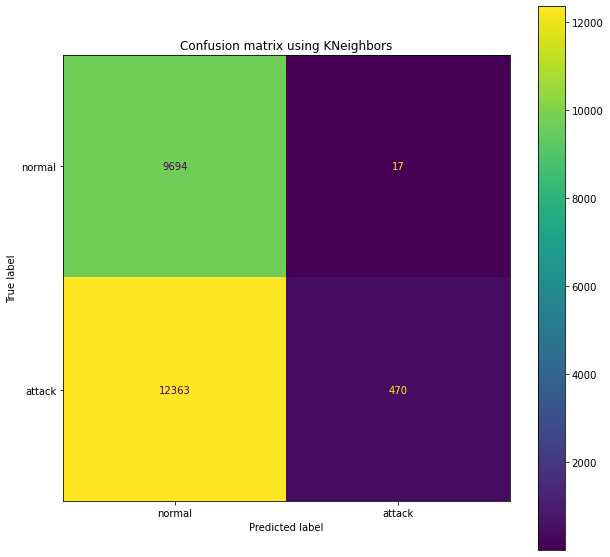

In [140]:
evaluation('KNeighbors', 1, knn_2, pca_train_1, y_train, pca_test_1, y_test)

In [142]:
pca_2 = PCA(n_components=40)
pca_train_2 = pca_2.fit_transform(x_train)
pca_test_2 = pca_2.fit_transform(x_test)

#### Linear regression

In [143]:
lr_pca_2 = LogisticRegression(max_iter=3000).fit(pca_train_2, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Linear Regression using PCA
Type of classification:
Number of features:  40
Test accuracy:  0.5762065294535131
Test precision:  0.6041415232166677
Test recall:  0.7411361334060625


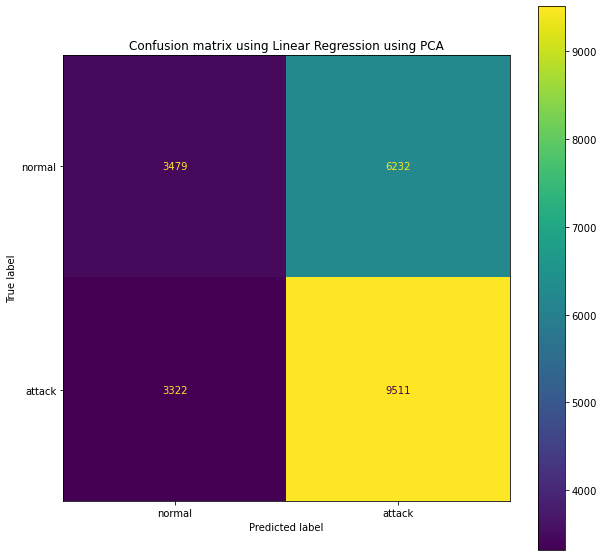

In [144]:
evaluation('Linear Regression using PCA', 1, lr_pca_2, pca_train_2, y_train, pca_test_2, y_test)

#### SVM

In [145]:
svm_3 = svm.LinearSVC().fit(pca_train_2, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model: SVM using PCA
Type of classification:
Number of features:  40
Test accuracy:  0.46562278211497515
Test precision:  0.519983728261975
Test recall:  0.7968518662822411


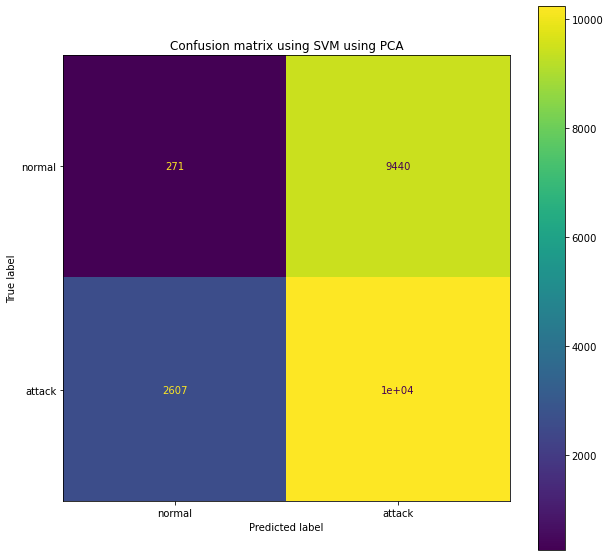

In [146]:
evaluation('SVM using PCA', 1, svm_3, pca_train_2, y_train, pca_test_2, y_test)

#### Decision Trees

In [147]:
dt_3 = DecisionTreeClassifier().fit(pca_train_2, y_train)

Model: Decision Tree using PCA
Type of classification:
Number of features:  40
Test accuracy:  0.38258516678495386
Test precision:  0.42922314911366005
Test recall:  0.2566040676381205


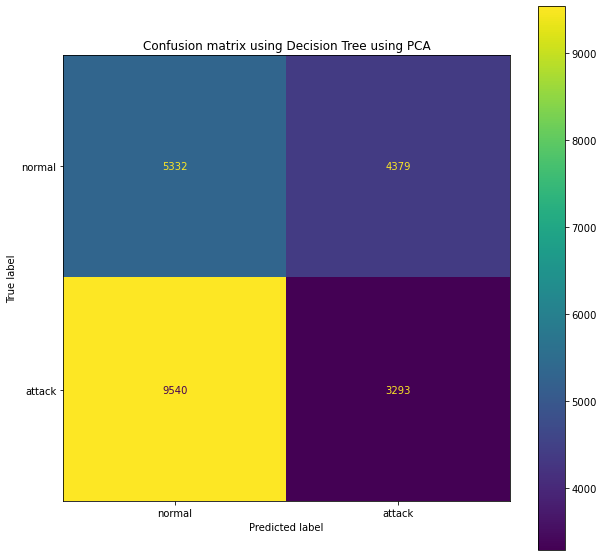

In [148]:
evaluation('Decision Tree using PCA', 1, dt_3, pca_train_2, y_train, pca_test_2, y_test)

#### Random Forests

In [149]:
rf_3 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy').fit(pca_train_2, y_train)

Model: Random Forests Decision Tree using PCA
Type of classification:
Number of features:  40
Test accuracy:  0.45404542228530875
Test precision:  0.9019908116385911
Test recall:  0.045897296033663215


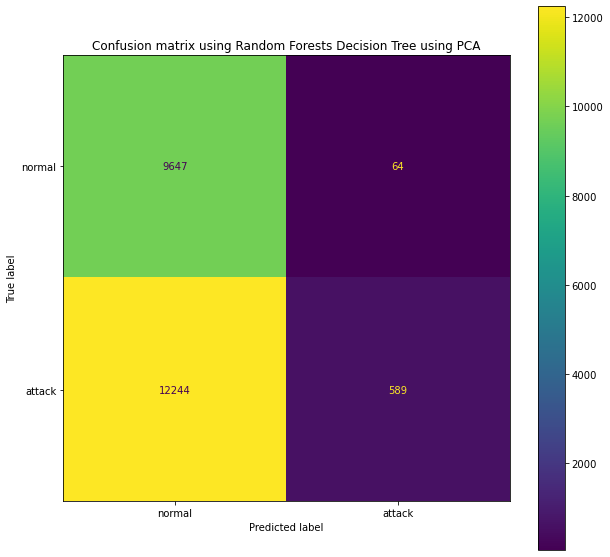

In [150]:
evaluation('Random Forests Decision Tree using PCA', 1, rf_3, pca_train_2, y_train, pca_test_2, y_test)

#### KNN

In [151]:
knn_3 = KNeighborsClassifier(n_neighbors=20).fit(pca_train_2, y_train)

Model: KNeighbors
Type of classification:
Number of features:  40
Test accuracy:  0.4508516678495387
Test precision:  0.9650924024640657
Test recall:  0.0366243279046209


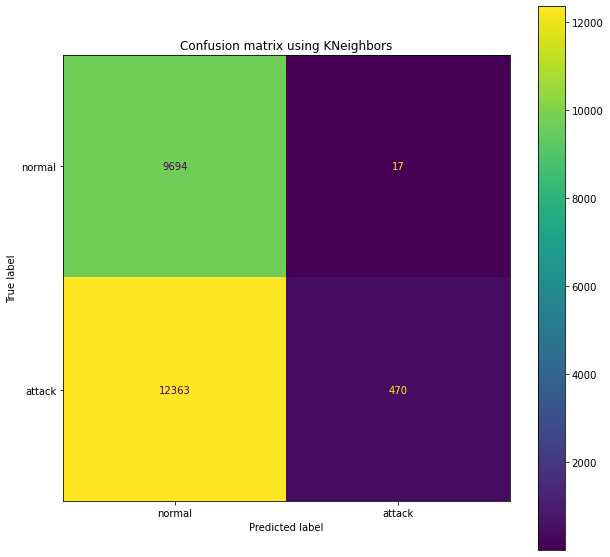

In [152]:
evaluation('KNeighbors', 1, knn_3, pca_train_2, y_train, pca_test_2, y_test)

In [153]:
pca_3 = PCA(n_components=20)
pca_train_3 = pca_3.fit_transform(x_train)
pca_test_3 = pca_3.fit_transform(x_test)

#### Linear regression

In [154]:
lr_pca_3 = LogisticRegression(max_iter=3000).fit(pca_train_3, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Linear Regression using PCA
Type of classification:
Number of features:  20
Test accuracy:  0.5723030518097941
Test precision:  0.6035165120352949
Test recall:  0.7248499961037949


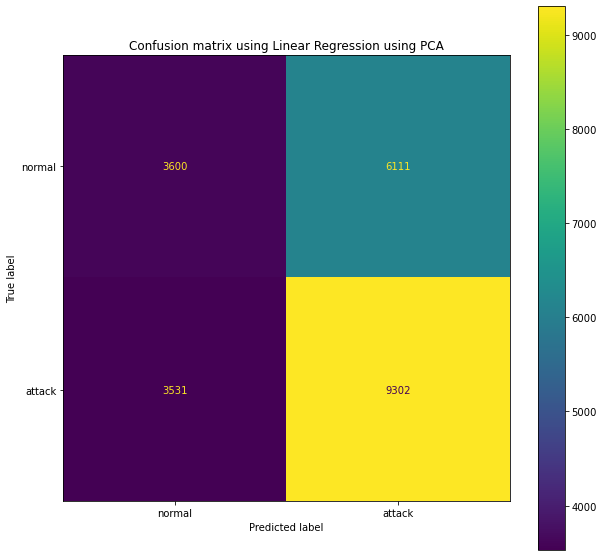

In [155]:
evaluation('Linear Regression using PCA', 1, lr_pca_3, pca_train_3, y_train, pca_test_3, y_test)

#### SVM

In [156]:
svm_4 = svm.LinearSVC().fit(pca_train_3, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model: SVM using PCA
Type of classification:
Number of features:  20
Test accuracy:  0.48757984386089426
Test precision:  0.5372275501307759
Test recall:  0.7202524740902361


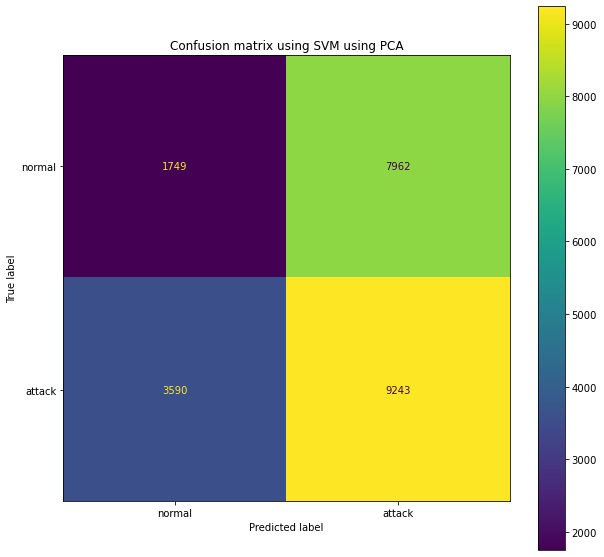

In [157]:
evaluation('SVM using PCA', 1, svm_4, pca_train_3, y_train, pca_test_3, y_test)

#### Decision trees

In [158]:
dt_4 = DecisionTreeClassifier().fit(pca_train_3, y_train)

Model: Decision Tree using PCA
Type of classification:
Number of features:  20
Test accuracy:  0.5349095102909865
Test precision:  0.6814528593508501
Test recall:  0.34356736538611393


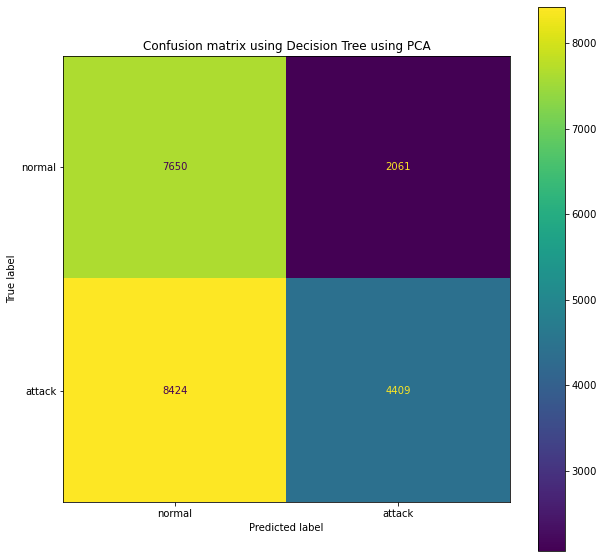

In [159]:
evaluation('Decision Tree using PCA', 1, dt_4, pca_train_3, y_train, pca_test_3, y_test)

#### Random Forests

In [160]:
rf_4 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy').fit(pca_train_3, y_train)

Model: Random Forests Decision Tree using PCA
Type of classification:
Number of features:  20
Test accuracy:  0.5141501064584811
Test precision:  0.862095531587057
Test recall:  0.17439414010753526


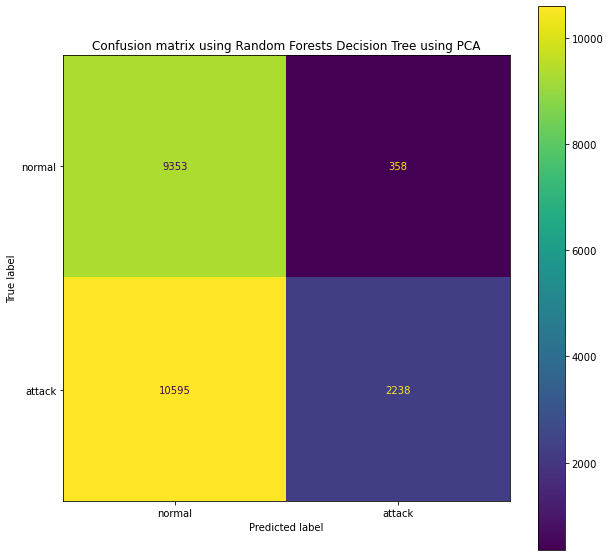

In [161]:
evaluation('Random Forests Decision Tree using PCA', 1, rf_4, pca_train_3, y_train, pca_test_3, y_test)

#### KNN

In [162]:
knn_4 = KNeighborsClassifier(n_neighbors=20).fit(pca_train_3, y_train)

Model: KNeighbors
Type of classification:
Number of features:  20
Test accuracy:  0.4508516678495387
Test precision:  0.9650924024640657
Test recall:  0.0366243279046209


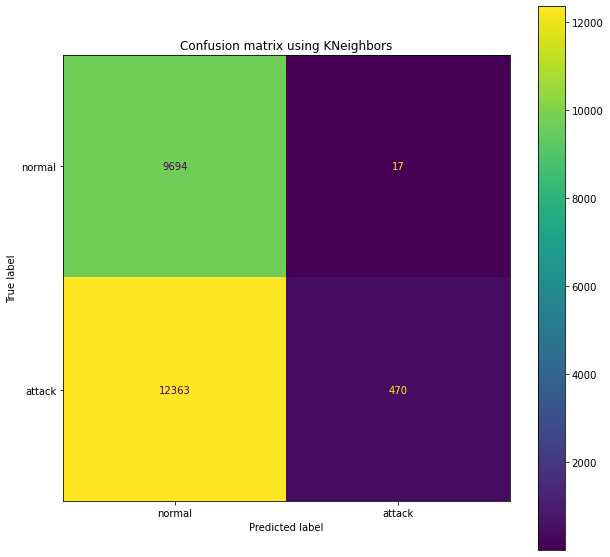

In [163]:
evaluation('KNeighbors', 1, knn_4, pca_train_3, y_train, pca_test_3, y_test)

## Multilabel classification


### without PCA

In [166]:
xM_train = DF.drop(['traffic_type', 'attack_type'], axis=1).values
yM_train = DF['attack_type'].values
xM_test = DF_TEST.drop(['traffic_type', 'attack_type'], axis=1).values
yM_test = DF_TEST['attack_type'].values

#### Linear regression

In [167]:
lrM = LogisticRegression(max_iter=3000).fit(xM_train, yM_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Linear Regression
Type of classification:
Number of features:  122
Test accuracy:  0.7441004258339248
Test precision:  0.7689917966057578
Test recall:  0.7441004258339248


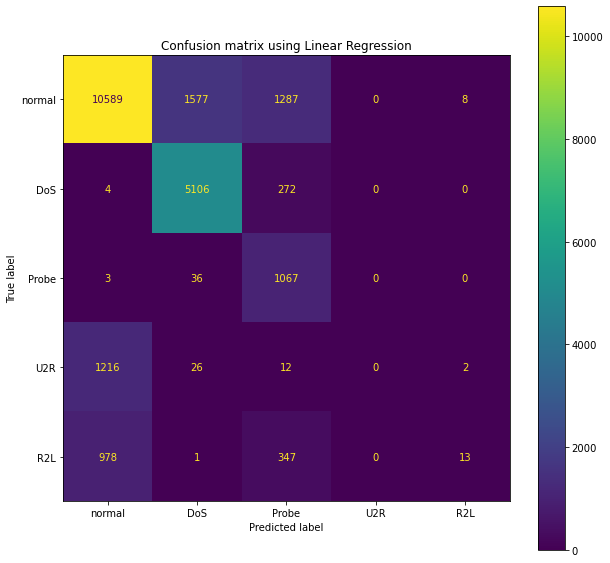

In [169]:
evaluation('Linear Regression', 0, lrM, xM_train, yM_train, xM_test, yM_test)

#### SVM

In [170]:
svm_5 = svm.LinearSVC(max_iter=3000).fit(xM_train, yM_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model: SVM
Type of classification:
Number of features:  122
Test accuracy:  0.6907824698367636
Test precision:  0.7222968570132077
Test recall:  0.6907824698367636


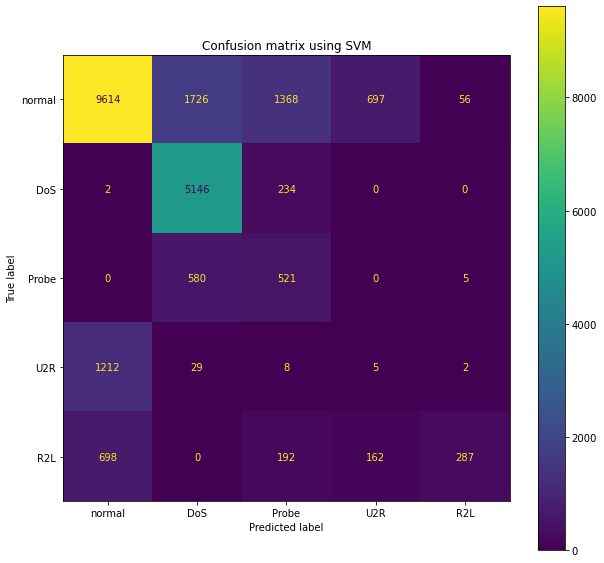

In [171]:
evaluation('SVM', 0, svm_5, xM_train, yM_train, xM_test, yM_test)

#### Decision tree

In [172]:
dt_5 = DecisionTreeClassifier().fit(xM_train, yM_train)

Model: Decision Tree
Type of classification:
Number of features:  122
Test accuracy:  0.7196149751596878
Test precision:  0.7358726017199454
Test recall:  0.7196149751596878


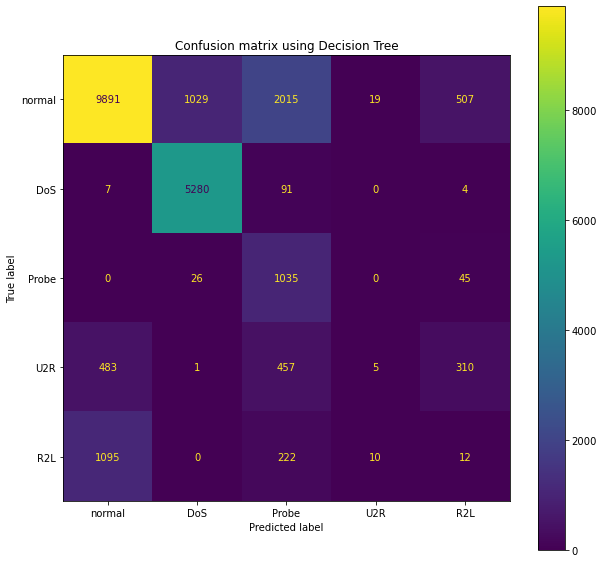

In [173]:
evaluation('Decision Tree', 0, dt_5, xM_train, yM_train, xM_test, yM_test)

#### Random Forests

In [174]:
rf_5 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy').fit(xM_train, yM_train)

Model: Random Forests Decision Tree
Type of classification:
Number of features:  122
Test accuracy:  0.827847764371895
Test precision:  0.856158281485894
Test recall:  0.827847764371895


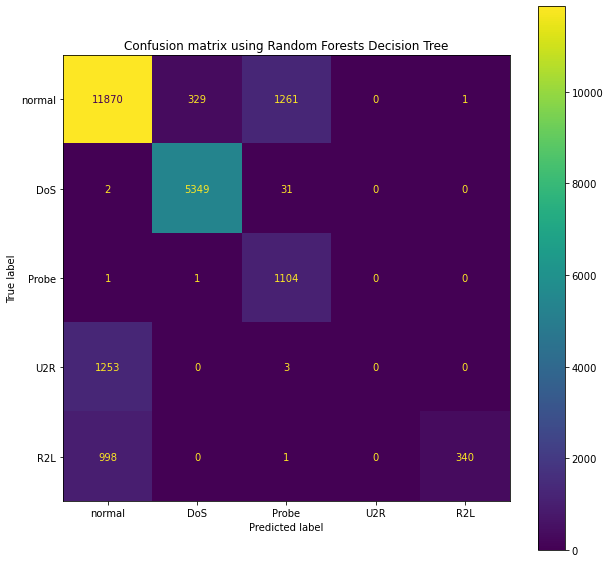

In [175]:
evaluation('Random Forests Decision Tree', 0, rf_5, xM_train, yM_train, xM_test, yM_test)

#### KNN

In [176]:
knn_5 = KNeighborsClassifier(n_neighbors=20).fit(xM_train, yM_train)

Model: KNeighbors
Type of classification:
Number of features:  122
Test accuracy:  0.8210610361958836
Test precision:  0.8440508869374592
Test recall:  0.8210610361958836


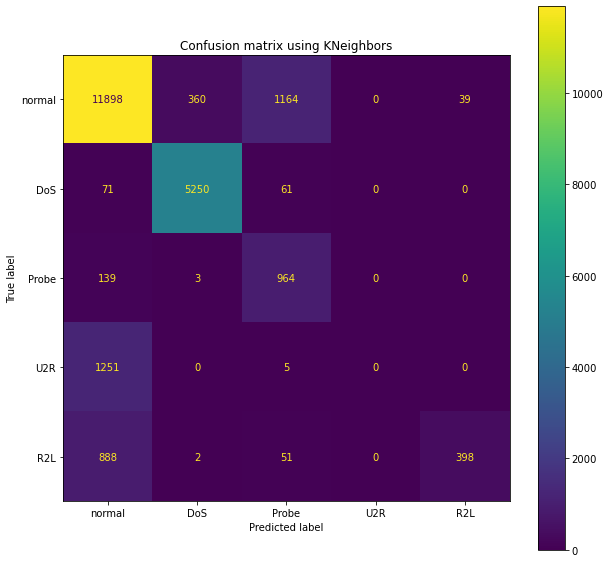

In [177]:
evaluation('KNeighbors', 0, knn_5, xM_train, yM_train, xM_test, yM_test)

In [199]:
Nfeatures = [122,80,40,20]

lr_ac = [round(0.8000798438608943, 4), round(0.5786462029808375, 4), round(0.5762065294535131, 4), round(0.5723030518097941, 4)]
lr_pre = [round(0.9022222222222223, 4), round(0.6038370499563972, 4), round(0.6041415232166677, 4), round(0.6035165120352949, 4)]
lr_re = [round(0.727655263773085, 4), round(0.7553962440582872, 4), round(0.7411361334060625, 4), round(0.7248499961037949, 4)]

svm_ac = [round(0.7997693399574166, 4), round(0.531139105748758, 4), round(0.46562278211497515, 4), round(0.48757984386089426, 4)]
svm_pre = [round(0.8814305364511692, 4), round(0.6032484715758737, 4), round(0.519983728261975, 4), round(0.5372275501307759, 4)]
svm_re = [round(0.7490064677004598, 4), round(0.515156237824359, 4), round(0.7968518662822411, 4), round(0.7202524740902361, 4)]

dt_ac = [round(0.8516234918381831, 4), round(0.4995120652945351, 4), round(0.38258516678495386, 4), round(0.5349095102909865, 4)]
dt_pre = [round(0.9436132410697587, 4), round(0.7051349920592906, 4), round(0.42922314911366005, 4), round(0.6814528593508501, 4)]
dt_re = [round(0.7863321125224032, 4), round(0.20758980752746825, 4), round(0.2566040676381205, 4), round(0.34356736538611393, 4)]

rf_ac = [round(0.8045156139105749, 4), round(0.4685947480482612, 4), round(0.45404542228530875, 4), round(0.5141501064584811, 4)]
rf_pre = [round(0.9581339712918661, 4), round(0.9144800777453839, 4), round(0.9019908116385911, 4), round(0.862095531587057, 4)]
rf_re = [round(0.6865892620587548, 4), round(0.07332657991116652, 4), round(0.045897296033663215, 4), round(0.17439414010753526, 4)]

knn_ac = [round(0.7716022001419447, 4), round(0.4508516678495387, 4), round(0.4508516678495387, 4), round(0.4508516678495387, 4)]
knn_pre = [round(0.9617788461538461, 4), round(0.9650924024640657, 4), round(0.9650924024640657, 4), round(0.9650924024640657, 4)]
knn_re = [round(0.623548663601652, 4), round(0.0366243279046209, 4), round(0.0366243279046209, 4), round(0.0366243279046209, 4)]

In [208]:
def calculateF1(prec,re):
    return (2*prec*re)/(prec+re)

def printMetrics(i):
    data = {
    'Model': ['LR', 'SVM', 'DT', 'RF', 'KNN'],
    'Accuracy': [lr_ac[i], svm_ac[i], dt_ac[i], rf_ac[i], knn_ac[i]],
    'Precision': [lr_pre[i], svm_pre[i], dt_pre[i], rf_pre[i], knn_pre[i]],
    'Recall': [lr_re[i], svm_re[i], dt_re[i], rf_re[i], knn_re[i]],
    'F1-score': [calculateF1(lr_pre[i], lr_ac[i]), calculateF1(svm_pre[i], svm_ac[i]) , calculateF1(dt_pre[i], dt_ac[i]), calculateF1(rf_pre[i], rf_ac[i]), calculateF1(knn_pre[i], knn_ac[i])]
    }
    metrixs = pd.DataFrame(data)
    print("Number of features: ", Nfeatures[i])
    print(metrixs)

printMetrics(0)
print("")
printMetrics(1)
print("")
printMetrics(2)
print("")
printMetrics(3)


Number of features:  122
  Model  Accuracy  Precision  Recall  F1-score
0    LR    0.8001     0.9022  0.7277  0.848088
1   SVM    0.7998     0.8814  0.7490  0.838620
2    DT    0.8516     0.9436  0.7863  0.895243
3    RF    0.8045     0.9581  0.6866  0.874607
4   KNN    0.7716     0.9618  0.6235  0.856265

Number of features:  80
  Model  Accuracy  Precision  Recall  F1-score
0    LR    0.5786     0.6038  0.7554  0.590931
1   SVM    0.5311     0.6032  0.5152  0.564859
2    DT    0.4995     0.7051  0.2076  0.584754
3    RF    0.4686     0.9145  0.0733  0.619673
4   KNN    0.4509     0.9651  0.0366  0.614638

Number of features:  40
  Model  Accuracy  Precision  Recall  F1-score
0    LR    0.5762     0.6041  0.7411  0.589820
1   SVM    0.4656     0.5200  0.7969  0.491299
2    DT    0.3826     0.4292  0.2566  0.404563
3    RF    0.4540     0.9020  0.0459  0.603994
4   KNN    0.4509     0.9651  0.0366  0.614638

Number of features:  20
  Model  Accuracy  Precision  Recall  F1-score
0    LR

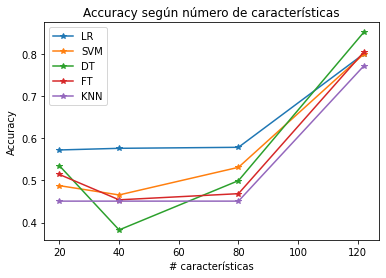

In [201]:
plt.figure()
plt.plot(Nfeatures, lr_ac, '*-',label='LR')
plt.plot(Nfeatures,svm_ac, '*-',label='SVM')
plt.plot(Nfeatures, dt_ac, '*-',label='DT')
plt.plot(Nfeatures,rf_ac, '*-',label='FT')
plt.plot(Nfeatures, knn_ac, '*-',label='KNN')
plt.legend()
plt.xlabel("# características")
plt.ylabel("Accuracy")
plt.title("Accuracy según número de características")
plt.show()

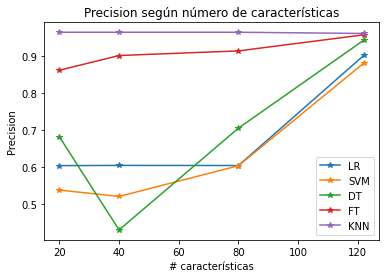

In [202]:
plt.figure()
plt.plot(Nfeatures, lr_pre, '*-',label='LR')
plt.plot(Nfeatures,svm_pre, '*-',label='SVM')
plt.plot(Nfeatures, dt_pre, '*-',label='DT')
plt.plot(Nfeatures,rf_pre, '*-',label='FT')
plt.plot(Nfeatures, knn_pre, '*-',label='KNN')
plt.legend()
plt.xlabel("# características")
plt.ylabel("Precision")
plt.title("Precision según número de características")
plt.show()

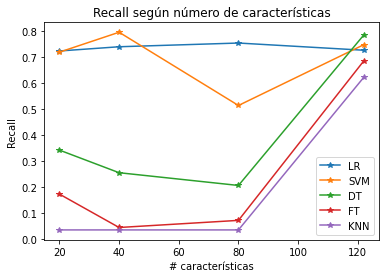

In [203]:
plt.figure()
plt.plot(Nfeatures, lr_re, '*-',label='LR')
plt.plot(Nfeatures,svm_re, '*-',label='SVM')
plt.plot(Nfeatures, dt_re, '*-',label='DT')
plt.plot(Nfeatures,rf_re, '*-',label='FT')
plt.plot(Nfeatures, knn_re, '*-',label='KNN')
plt.legend()
plt.xlabel("# características")
plt.ylabel("Recall")
plt.title("Recall según número de características")
plt.show()